In [1]:
import random as r
import math as m
import msvcrt
import matplotlib.pyplot as plt
import statistics

In [2]:
#defining all the functions needed
def perturbation(lst,ind,ifactor,precision):
    lst1 = [round(_ + (ifactor/(pow(2, abs(ind-lst.index(_))+1))),precision) for _ in lst]
    return lst1

def diff(lst):
    minimum = min(lst)
    maximum = max(lst)
    diff = maximum - minimum
    return diff

def central_tendency(l):
    arith_mean = statistics.mean(l)
    
    return round(arith_mean,4)
    

def plotting(x_list, y_list, ytitle):
    plt.plot(x_list, y_list)
    plt.title('Graph')
    plt.grid(True, which = 'both')
    plt.xlabel('Iterations')
    plt.ylabel(ytitle)
    plt.show()

In [3]:
#input and initializing variables and lists
n = int(input("number of particles: ")) #number of particles x in list X
iteration = int(input("number of iterations: "))
lst_X = []
precision = 4
counter = 1
x_plot = []
y_plot = []
arm = [] #list containing means of list V of each iteration

number of particles: 10000
number of iterations: 100


In [4]:
#initializing list X for the first time
for _ in range(n):
    while True:
        ele = round(r.uniform(-10000,10000+1), precision)
        if ele not in lst_X: #to remove duplicate values as 2 particles cannot be at the same position
            lst_X.append(ele)    
            break

In [5]:
lst_X.sort() #sorting the list in ascending order

In [6]:
lst_V = [round(m.sin(x), precision) for x in lst_X] #initializing the first list V

arm.append(central_tendency(lst_V)) #mean of list V


V_d = diff(lst_V)                  #difference between the highest and lowest V(x) in list V
x_plot.append(counter)
y_plot.append(V_d)

In [7]:
#main execution of the system
for E in range(iteration-1):
        
    #lst_V = [round(m.sin(x) ,precision) for x in lst_X] #earlier version; led to issues

    some_list = [1,2,3,4]             #for the random perturbation
    random_num = r.randint(1,101)     #probability is decided
    
    if random_num in some_list:        #and based on a rule defined in perturbation()
        ifactor = r.randint(-50,51)    #values in list V are updated
        pert = r.choice(lst_V)
        ind = lst_V.index(pert)
        
        lst_V = perturbation(lst_V,ind,ifactor,precision)
        print(counter)
        
    '''V_d = diff(lst_V)
    x_plot.append(counter)
    y_plot.append(V_d)'''
    
    for e in range(len(lst_V)):                                    #defining how further list X and 
        y = round(r.uniform(lst_V[e]-4,lst_V[e]+5), precision)     #list V will be updated based on
        lst_X[e]  = round(lst_X[e],precision) + y                  #their earlier iteration; rules are
        lst_V[e] = round(m.sin(lst_X[e]) + y, precision)           #arbitrary and can be changed

    counter+=1

    arm.append(central_tendency(lst_V))                             #mean of list V for every iteration stored

    V_d = diff(lst_V)
    x_plot.append(counter)
    y_plot.append(V_d)

    #counter+=1

30


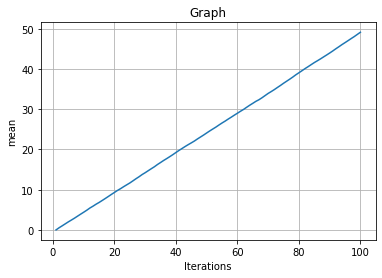

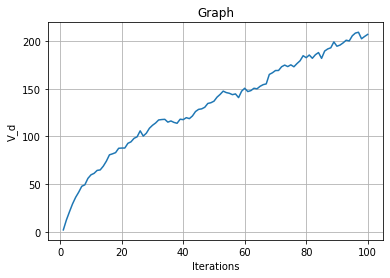

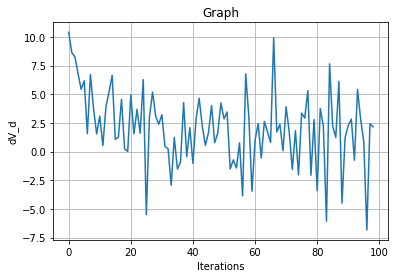

In [8]:
#plotting different graphs

plotting(x_plot, arm, ytitle = 'mean')           #plotting Mean vs Iterations

  
dV_d = []                                       #defining a list for change in V_d
for d in range(len(y_plot)-1):                  #and plotting dV_d vs Iterations
    diff_d = -(y_plot[d] - y_plot[d+1])         #to see how V_d of each iteration changes
    dV_d.append(diff_d)


plotting(x_plot, y_plot, ytitle = 'V_d')      #plotting V_d vs Iteration

number = list(range(iteration-1))
plotting(number, dV_d, ytitle = 'dV_d')       #plotting dV_d vs Iteration


In [ ]:
char = msvcrt.getch()
